### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### load the data set into python environment

In [2]:
data = pd.read_csv(r"F:\ICTAK\data sets\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### make 'PassengerId' as the index column 

In [4]:
data = data.set_index('PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic details of the data set

#### Summary of the data set 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### basic descriptive statistics of numerical columns

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### dimension of the data set

In [8]:
data.shape

(891, 11)

#### list of columns 

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Handling missing values

#### checking null values 

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### Null values present in 'Age', 'Cabin', and 'Embarked' columns

##### histogram for 'Age' column

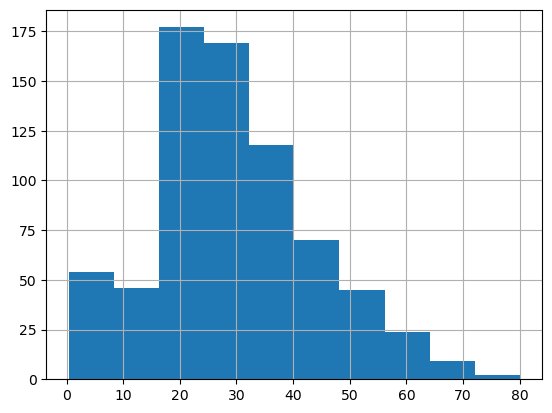

In [11]:
data['Age'].hist()
plt.show()

##### from the graph above we can see that 'Age' is normally distributed so we can use mean, median, or mode to fill the null values.

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())

##### filling null values in 'Cabin' and 'Embarked' columns using mode

In [13]:
for i in ['Cabin', 'Embarked']:
    data[i] = data[i].fillna(data[i].mode()[0])

In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Outlier detection and handling

#### outlier detection and handling of 'Age' column 

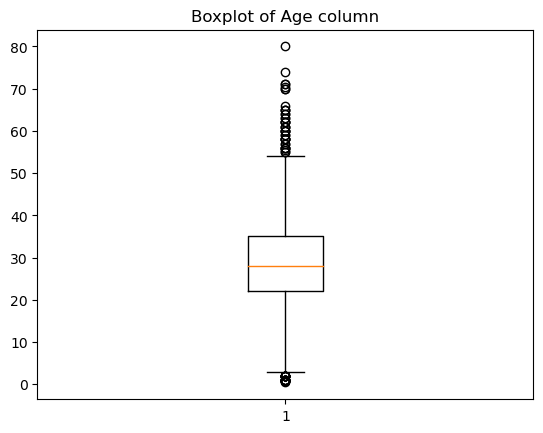

In [15]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')
plt.show()

#### find 25th(Q1), 50th(Q2), and 75th(Q3) percentiles of the data

In [16]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [17]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


#### find interquartile range - IQR

In [18]:
IQR = Q3-Q1
print(IQR)

13.0


#### find lower and upper limits 

In [19]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [20]:
print(lower_limit)
print(upper_limit)

2.5
54.5


#### finding outliers

In [21]:
outlier = []
for x in data['Age']:
    if ((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [22]:
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


#### finding index of outlier values

In [23]:
lower_val = data['Age']<lower_limit
upper_val = data['Age']>upper_limit

In [24]:
lower_ind = data.loc[lower_val].index
upper_ind = data.loc[upper_val].index

In [25]:
print(lower_ind)

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')


In [26]:
print(upper_ind)

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')


In [27]:
index_list1 = list(lower_ind)+list(upper_ind)

In [28]:
if(len(outlier)==len(index_list1)):
    print("index_list contains index values for all outliers")
else:
    print("Error")

index_list contains index values for all outliers


##### drop outliers

In [29]:
data.drop(index_list1, inplace=True)

In [30]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


#### outlier detection and handling of 'Fare' column

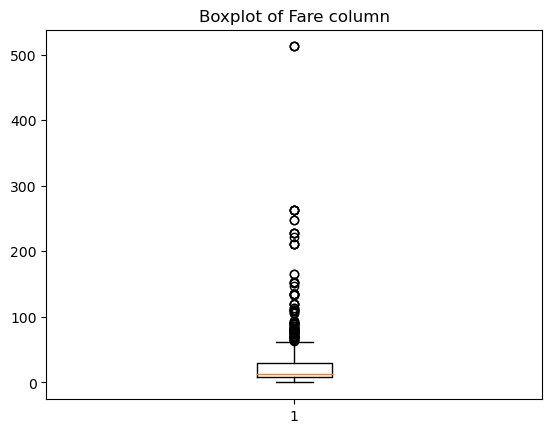

In [31]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')
plt.show()

#### find 25th(Q1), 50th(Q2), and 75th(Q3) percentiles of the data

In [32]:
fare_Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
fare_Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
fare_Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [33]:
print(fare_Q1)
print(fare_Q2)
print(fare_Q3)

7.8958
13.4167
30.0708


##### find interquartile range IQR

In [35]:
fare_IQR = fare_Q3-fare_Q1
print(fare_IQR)

22.174999999999997


##### find lower and upper limits

In [36]:
lower_limit1 = fare_Q1-1.5*fare_IQR
upper_limit1 = fare_Q3+1.5*fare_IQR

In [37]:
print(lower_limit1)
print(upper_limit1)

-25.366699999999994
63.333299999999994


##### finding outlier values

In [38]:
fare_outlier = []
for x in data['Fare']:
    if ((x>upper_limit1) or (x<lower_limit1)):
        fare_outlier.append(x)

In [39]:
print(fare_outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


##### finding index of outlier values

In [40]:
lower_val1 = data['Fare']<lower_limit1
upper_val1 = data['Fare']>upper_limit1

In [41]:
lower_ind1 = data.loc[lower_val1].index
upper_ind1 = data.loc[upper_val1].index

In [42]:
index_list2 = list(lower_ind1)+list(upper_ind1)

In [45]:
print(index_list2)

[2, 28, 32, 35, 53, 62, 63, 73, 89, 98, 103, 119, 121, 125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847, 850, 857, 864]


In [46]:
if(len(fare_outlier)==len(index_list2)):
    print("index_list2 contains index values for all outliers")
else:
    print("Error")

index_list2 contains index values for all outliers


##### drop outliers

In [49]:
data.drop(index_list2, inplace=True)

In [51]:
data.head(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


#### outlier detection and handling of 'Parch' column

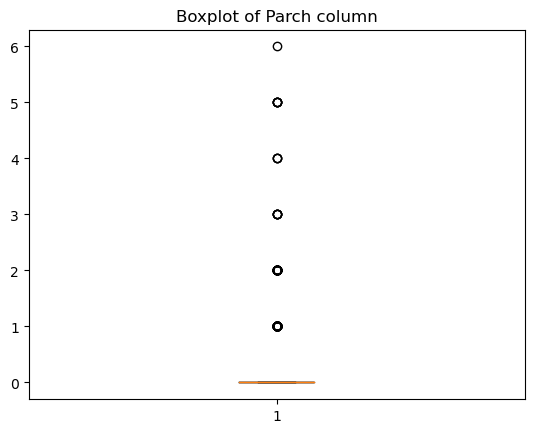

In [68]:
plt.boxplot(data['Parch'])
plt.title('Boxplot of Parch column')
plt.show()

#### find 25th(Q1), 50th(Q2), and 75th(Q3) percentiles of the data

In [69]:
PQ1 = np.percentile(data['Parch'], 25, interpolation='midpoint')
PQ2 = np.percentile(data['Parch'], 50, interpolation='midpoint')
PQ3 = np.percentile(data['Parch'], 75, interpolation='midpoint')

In [70]:
print(PQ1)
print(PQ2)
print(PQ3)

0.0
0.0
0.0


##### find interquartile range - IQR

In [71]:
Parch_IQR = PQ3-PQ1
print(Parch_IQR)

0.0


##### find lower and upper limits

In [72]:
lower_limit2 = PQ1-1.5*Parch_IQR
upper_limit2 = PQ3+1.5*Parch_IQR

In [73]:
print(lower_limit2)
print(upper_limit2)

0.0
0.0


##### finding outliers

In [74]:
Parch_outlier = []
for x in data['Parch']:
    if ((x>upper_limit2) or (x<lower_limit2)):
        Parch_outlier.append(x)

In [75]:
print(Parch_outlier)

[2, 1, 5, 1, 5, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 4, 1, 2, 1, 1, 2, 5, 1, 1, 1, 2, 1, 5, 1, 1, 1, 6, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 5, 2]


##### finding index

In [76]:
lower_val2 = data['Parch']<lower_limit2
upper_val2 = data['Parch']>upper_limit2

In [77]:
lower_ind2 = data.loc[lower_val2].index
upper_ind2 = data.loc[upper_val2].index

In [78]:
index_list3 = list(lower_ind2)+list(upper_ind2)

In [79]:
print(index_list3)

[9, 11, 14, 25, 26, 44, 51, 59, 60, 64, 66, 69, 72, 87, 94, 99, 129, 137, 141, 146, 148, 149, 154, 156, 161, 166, 167, 168, 172, 176, 177, 183, 185, 189, 194, 198, 230, 234, 238, 248, 249, 252, 255, 256, 260, 262, 267, 273, 274, 279, 280, 313, 315, 324, 329, 330, 349, 353, 357, 361, 363, 375, 395, 408, 410, 417, 418, 420, 424, 425, 437, 438, 441, 447, 449, 451, 473, 481, 486, 490, 507, 524, 530, 533, 534, 536, 540, 542, 543, 549, 550, 568, 581, 594, 596, 601, 609, 611, 617, 619, 623, 635, 638, 639, 652, 658, 671, 679, 684, 686, 687, 692, 703, 710, 721, 737, 747, 751, 752, 775, 784, 788, 800, 802, 814, 818, 820, 824, 849, 851, 853, 854, 856, 859, 870, 872, 881, 886, 889]


In [82]:
if(len(fare_outlier)==len(index_list2)):
    print("index_list3 contains index values for all outliers")
else:
    print("Error")

index_list3 contains index values for all outliers


##### drop outliers

In [83]:
data.drop(index_list3, inplace=True)

In [84]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,B96 B98,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,B96 B98,S


### MinMax Scaling

#### prepare data for scaling

In [85]:
data1 = data.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [86]:
data1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583


##### import MinMaxScaler library

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
minmax = MinMaxScaler(feature_range=(0,1))

In [89]:
scaled_data = minmax.fit_transform(data1)

In [90]:
scaled_data = pd.DataFrame(scaled_data, columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

##### After scaling

In [91]:
scaled_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,579.000000,579.000000,579.000000,579.0,579.000000
mean,0.751295,0.496140,0.069660,0.0,0.244192
std,0.366614,0.174251,0.157909,0.0,0.205759
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.500000,0.387755,0.000000,0.0,0.127094
50%,1.000000,0.469388,0.000000,0.0,0.141602
75%,1.000000,0.561224,0.000000,0.0,0.261136
max,1.000000,1.000000,1.000000,0.0,1.000000


##### Before scaling

In [93]:
data1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,579.000000,579.000000,579.000000,579.0,579.000000
mean,2.502591,29.310881,0.208981,0.0,14.938441
std,0.733228,8.538286,0.473727,0.0,12.587280
min,1.000000,5.000000,0.000000,0.0,0.000000
25%,2.000000,24.000000,0.000000,0.0,7.775000
50%,3.000000,28.000000,0.000000,0.0,8.662500
75%,3.000000,32.500000,0.000000,0.0,15.975000
max,3.000000,54.000000,3.000000,0.0,61.175000
